<a href="https://colab.research.google.com/github/cristinarainich/DDCS/blob/main/Results_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sns.set()

In [4]:
# put everything in a separate folder
working_path = Path('/content/drive/MyDrive/KKNV/data/tv')

In [5]:
cd /content/drive/MyDrive/KKNV/data/tv

/content/drive/MyDrive/KKNV/data/tv


In [6]:
!ls /content/drive/MyDrive/KKNV/data/tv/motion

Erik_sham_left.csv   Erik_stim_left.csv   Kris_sham_left.csv   Kris_stim_left.csv
Erik_sham_right.csv  Erik_stim_right.csv  Kris_sham_right.csv  Kris_stim_right.csv


## RAN results



In [7]:
# PUT THE VALUES BELOW
# Group, session, RANletters Acc 1, RANletters Acc 2, RANletters RT 1, RANletters RT 2
# RANnumbers Acc 1, RANnumbers Acc 2, RANnumbers RT 1, RANnumbers RT 2
raw1 = ['Eric', 1, 0, 0, 18, 17, 1, 0, 15, 13] # stimulation
raw2 = ['Eric', 2, 0, 0, 21, 20, 0, 0, 17, 18] # sham
raw3 = ['Kristin', 1, 1, 1, 21, 25, 2, 0, 22, 21] # stimulation
raw4 = ['Kristin', 2, 2, 1, 19, 18, 2, 0, 21, 19] # sham

rows = []
rows.append(raw1)
rows.append(raw2)
rows.append(raw3)
rows.append(raw4)
column_names = ['Subject', 'Session', 'RANL ACC 1', 'RANL ACC 2', 'RANL RT 1', 'RANL RT 2', 'RANN ACC 1', 'RANN ACC 2', 'RANN RT 1', 'RANN RT 2']

In [8]:
df = pd.DataFrame(rows, columns=column_names)

In [9]:
df['AccL'] = 100 - df[['RANL ACC 1', 'RANL ACC 2']].mean(axis=1) * 100/50
df['AccN'] = 100 - df[['RANN ACC 1', 'RANN ACC 2']].mean(axis=1) * 100/50
df['RT L'] = df[['RANL RT 1', 'RANL RT 2']].mean(axis=1)
df['RT N'] = df[['RANN RT 1', 'RANN RT 1']].mean(axis=1)

In [10]:
df['Genauigkeit'] = df[['AccL', 'AccN']].mean(axis=1)
df['Reaktionszeit'] = df[['RT L', 'RT N']].mean(axis=1)

In [11]:
df

,Subject,Session,RANL ACC 1,RANL ACC 2,RANL RT 1,RANL RT 2,RANN ACC 1,RANN ACC 2,RANN RT 1,RANN RT 2,AccL,AccN,RT L,RT N,Genauigkeit,Reaktionszeit
0,Eric,1,0,0,18,17,1,0,15,13,100.0,99.0,17.5,15.0,99.5,16.25
1,Eric,2,0,0,21,20,0,0,17,18,100.0,100.0,20.5,17.0,100.0,18.75
2,Kristin,1,1,1,21,25,2,0,22,21,98.0,98.0,23.0,22.0,98.0,22.50
3,Kristin,2,2,1,19,18,2,0,21,19,97.0,98.0,18.5,21.0,97.5,19.75


In [12]:
df[['Subject', 'Session', 'AccL', 'AccN', 'RT L', 'RT N', 'Genauigkeit', 'Reaktionszeit']]

,Subject,Session,AccL,AccN,RT L,RT N,Genauigkeit,Reaktionszeit
0,Eric,1,100.0,99.0,17.5,15.0,99.5,16.25
1,Eric,2,100.0,100.0,20.5,17.0,100.0,18.75
2,Kristin,1,98.0,98.0,23.0,22.0,98.0,22.50
3,Kristin,2,97.0,98.0,18.5,21.0,97.5,19.75


In [13]:
def create_plots(data, plot, title):
  bar_width = 0.7
  positions = list(range(len(data['Subject'].unique()) * 2)) # Twice the number of subjects for two sessions
  # Create subplots
  fig, ax = plt.subplots(figsize=(6, 6))

  pastel_blue = '#AEC6CF'
  pastel_orange = '#FFB347'

  #session 1 = stimulation, session 2 = sham

  subjects = data['Subject'].unique()
  for i, subject in enumerate(subjects):
      session1_value = data[(data['Subject'] == subject) & (data['Session'] == 1)][plot].mean()
      session2_value = data[(data['Subject'] == subject) & (data['Session'] == 2)][plot].mean()

    # Plotting session values with different colors for different sessions
      ax.bar(i * 2 - bar_width/2, session1_value, bar_width, alpha=0.7, label=f'Stimulation' if i == 0 else "", color=pastel_blue)
      ax.bar(i * 2 + bar_width/2, session2_value, bar_width, alpha=0.7, label=f'Keine Stimulation' if i == 0 else "", color=pastel_orange)

# Setting the y-axis label and the title
  ax.set_ylabel(plot)
  ax.set_title(title)

# Setting the position of the x ticks
  ax.set_xticks([i * 2 for i in range(len(subjects))])
  ax.set_xticklabels(subjects)

# Adding the legend and showing the plot
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

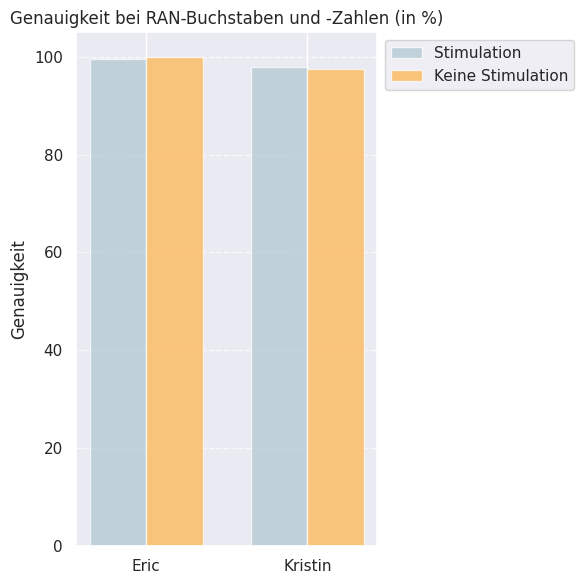

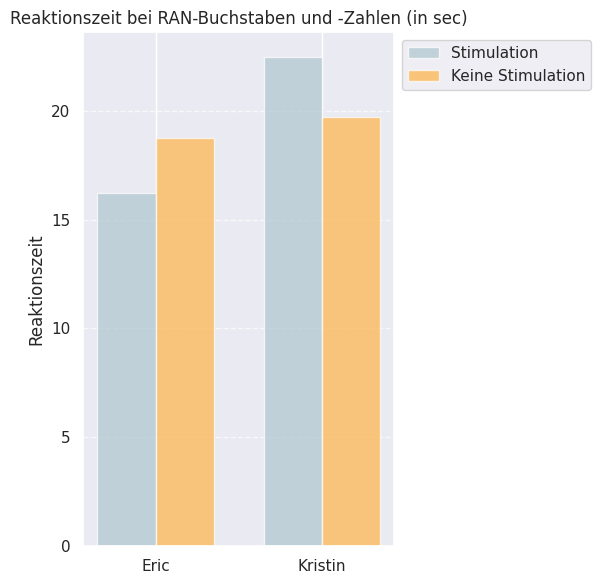

In [14]:
create_plots(df, 'Genauigkeit', 'Genauigkeit bei RAN-Buchstaben und -Zahlen (in %)')
print('')
print('')
print('')
create_plots(df, 'Reaktionszeit', 'Reaktionszeit bei RAN-Buchstaben und -Zahlen (in sec)')

## Spoonerism

For spoonerism, we have 20 trials with a slide of instruction in between. instruction slides - 10 with nouns - instrcution - 10 with verbs - end slide

In [15]:
# change the names of the files according to the format
# "Erik_stimulation.log", "Erik_sham.log"
# "Kristin_stimulation.log", "Kristin_sham.log"
file_names = [
    "Erik_stimulation.log", "Erik_sham.log",
    "Kristin_stimulation.log", "Kristin_sham.log"
]

In [16]:
# for reaction time
# session 1 = stimulation, session 2 = sham
all_data = pd.DataFrame()
for name in file_names:
  data = pd.read_csv(
        working_path.joinpath(name),
        delimiter='\t', skiprows=1, encoding='utf-8', on_bad_lines='skip')
  df = data.reset_index()
  df.columns = df.iloc[0]
  df = df.drop(0)
  df = df[['Subject', 'Trial', 'Time', 'TTime']]
  df = df.drop([1, 2, 3, 4, 5, 6, 7, 18, 29, 30], axis = 0) # recheck in the task!!!!
  if 'stimulation' in name:
    df['Session'] = 1
  elif 'sham' in name:
    df['Session'] = 2
  all_data = pd.concat([all_data, df])

In [17]:
all_data = all_data.rename({'TTime':'Reaktionszeit'}, axis=1)
all_data['Reaktionszeit'] = all_data['Reaktionszeit'].astype(int)
all_data['Reaktionszeit'] = np.log(all_data['Reaktionszeit'])

In [18]:
all_data

,Subject,Trial,Time,Reaktionszeit,Session
8,dd06,8,503894,11.276291,1
9,dd06,9,572373,11.132865,1
10,dd06,10,655254,11.323483,1
11,dd06,11,724854,11.148837,1
12,dd06,12,791414,11.102759,1
...,...,...,...,...,...
24,DD03,24,1353017,11.124037,2
25,DD03,25,1417817,11.077918,2
26,DD03,26,1478377,11.009291,2
27,DD03,27,1537737,10.989926,2


In [19]:
# simulation
subject1 = ['Eric'] * 40
subject2 = ['Kristin'] * 40
subject = subject1 + subject2

In [20]:
all_data['Subject'] = subject

In [21]:
# adding the accuracy results in the spoonerism task
erik_stim = [100] * 20
erik_sham = [100] * 20
kris_stim = [100] * 19 + [0]
kris_sham = [100] * 18 + [0] * 2
accuracy = erik_stim + erik_sham + kris_stim + kris_sham # exactly in this order

In [22]:
all_data['Genauigkeit'] = accuracy

In [23]:
def create_plots(data, plot, title):
  bar_width = 0.7
  positions = list(range(len(data['Subject'].unique()) * 2)) # Twice the number of subjects for two sessions
  # Create subplots
  fig, ax = plt.subplots(figsize=(6, 6))

  pastel_blue = '#AEC6CF'
  pastel_orange = '#FFB347'

  #session 1 = stimulation, session 2 = sham

  subjects = data['Subject'].unique()
  for i, subject in enumerate(subjects):
      session1_value = data[(data['Subject'] == subject) & (data['Session'] == 1)][plot].mean()
      session2_value = data[(data['Subject'] == subject) & (data['Session'] == 2)][plot].mean()

    # Plotting session values with different colors for different sessions
      ax.bar(i * 2 - bar_width/2, session1_value, bar_width, alpha=0.7, label=f'Stimulation' if i == 0 else "", color=pastel_blue)
      ax.bar(i * 2 + bar_width/2, session2_value, bar_width, alpha=0.7, label=f'Keine Stimulation' if i == 0 else "", color=pastel_orange)

# Setting the y-axis label and the title
  ax.set_ylabel(plot)
  ax.set_title(title)

# Setting the position of the x ticks
  ax.set_xticks([i * 2 for i in range(len(subjects))])
  ax.set_xticklabels(subjects)

# Adding the legend and showing the plot
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

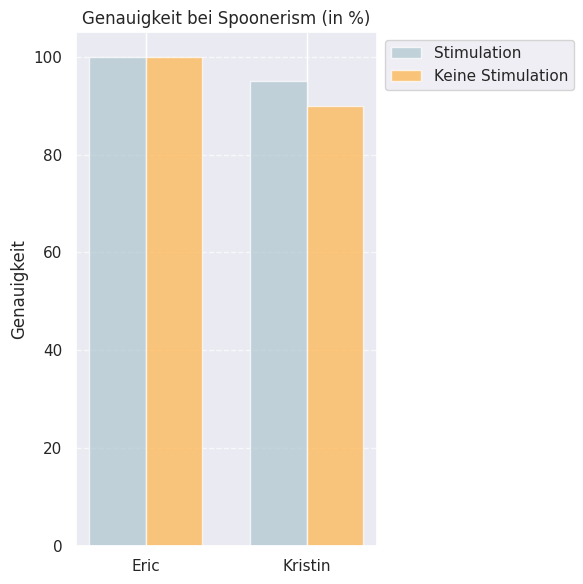

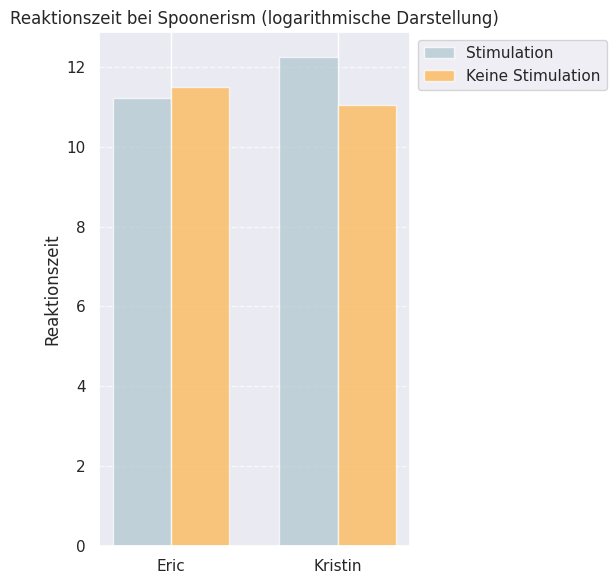

In [24]:
create_plots(all_data, 'Genauigkeit', 'Genauigkeit bei Spoonerism (in %)')
create_plots(all_data, 'Reaktionszeit', 'Reaktionszeit bei Spoonerism (logarithmische Darstellung)')

## Motion perception

We usually have 3-4 or more files for motion perception because we restarting it several times. The first short one is always practice. One could ignore it.

In [25]:
!ls /content/drive/MyDrive/KKNV/data/tv/motion

Erik_sham_left.csv   Erik_stim_left.csv   Kris_sham_left.csv   Kris_stim_left.csv
Erik_sham_right.csv  Erik_stim_right.csv  Kris_sham_right.csv  Kris_stim_right.csv


We have three files that one might use: base report, staircase left and right. We can build staircases for two hemifields.

In [26]:
working_path = Path('/content/drive/MyDrive/KKNV/data/tv/motion/')

In [27]:
def inspect_file(file_path, num_lines=20):
    with open(file_path, 'r', encoding='utf-8') as f:
        for i in range(num_lines):
            print(f"{i}: {f.readline()}")

In [28]:
# Inspect the first few lines of the file
file_path = working_path.joinpath('StaircaseValuesR.csv')
inspect_file(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/KKNV/data/tv/motion/StaircaseValuesR.csv'

So imagine, we have sets of data from Erik sham and stim and Kristin sham and stim. Also the information comes from different visual fields

In [29]:
def read_staircase(file_path):
    # Initialize dictionaries to store different sections
    metadata = {}
    reversal_list = []
    response_data = None

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # Extract metadata
    metadata_row = lines[0].strip().split(',')
    metadata_values = lines[1].strip().split(',')
    metadata = dict(zip(metadata_row, metadata_values))

    # Find the start indices for each section
    reversal_start_idx = lines.index('Reversal List\n') + 1
    response_start_idx = lines.index('Response,Staircase Points\n') + 1

    # Extract response data
    response_data = pd.read_csv(file_path, delimiter=',', skiprows=response_start_idx - 1)

    return metadata, response_data

In [30]:
file_names = ['Erik_sham_left', 'Erik_sham_right',
              'Erik_stim_left', 'Erik_stim_right',
              'Kris_sham_left', 'Kris_sham_right',
              'Kris_stim_left', 'Kris_stim_right']

In [31]:
# collecting all the information from each of the files in the all_datasets
meta_all = pd.DataFrame()
response_all = pd.DataFrame()
for name in file_names:
  meta, response = read_staircase(
    working_path.joinpath(name + '.csv')
    )
  new_meta = pd.DataFrame([meta])
  new_meta['Session'] = name
  meta_all = pd.concat([meta_all, new_meta])

  response['Session'] = name
  response_all = pd.concat([response_all, response])
meta_all['Estimated threshold '] = meta_all['Estimated threshold '].astype(float)

In [32]:
df = meta_all[['Estimated threshold ', 'Session']]
df['Subject'] = ['Eric'] * 4 + ['Kristin'] * 4
df['Seite'] = ['Left visual field/Linkes Gesichtsfeld', 'Right visual field/Rechtes Gesichtsfeld'] * 4
df['Session_new'] = ['Keine Stimulation', 'Keine Stimulation', 'Stimulation', 'Stimulation',
                     'Keine Stimulation', 'Keine Stimulation', 'Stimulation', 'Stimulation']

<ipython-input-32-71c0a7dbe94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject'] = ['Eric'] * 4 + ['Kristin'] * 4
<ipython-input-32-71c0a7dbe94b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seite'] = ['Left visual field/Linkes Gesichtsfeld', 'Right visual field/Rechtes Gesichtsfeld'] * 4
<ipython-input-32-71c0a7dbe94b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

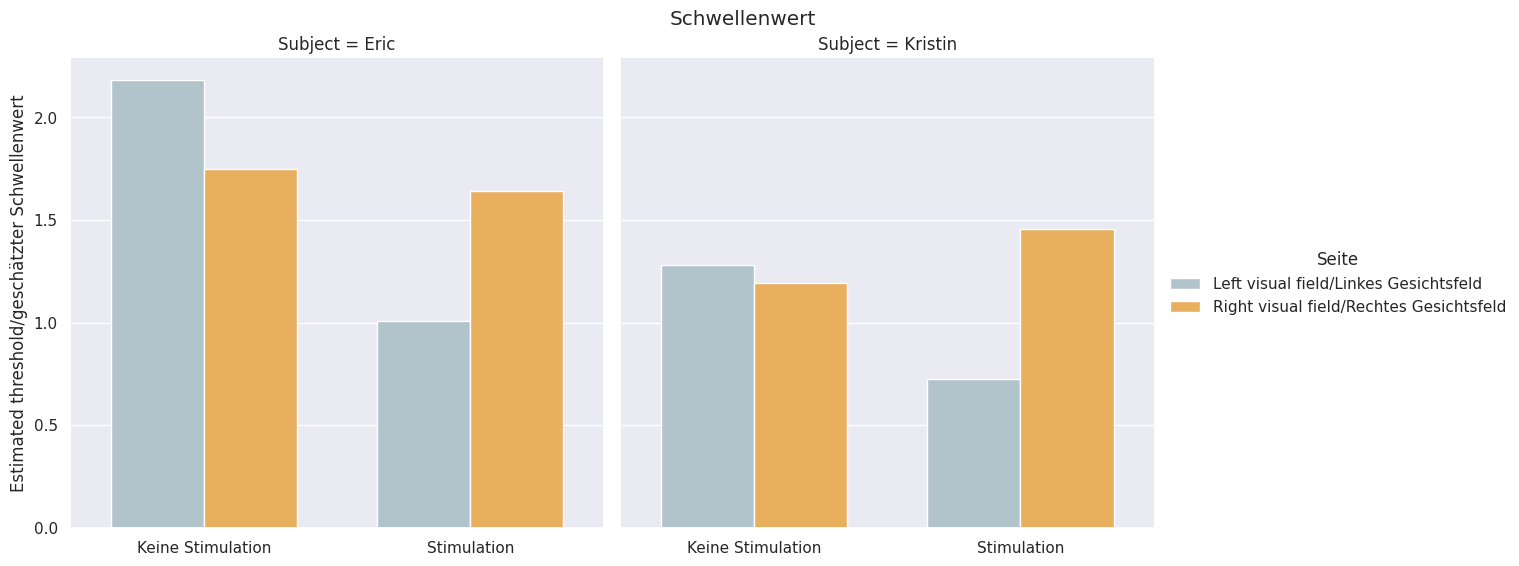

In [37]:
pastel_blue = '#AEC6CF'
pastel_orange = '#FFB347'
custom_palette = [pastel_blue, pastel_orange]
threshold = sns.catplot(
    data=df, kind='bar',
    x='Session_new', y='Estimated threshold ', hue='Seite', col='Subject',
    height=6, errorbar=None, width = 0.7,
    palette=custom_palette
)
threshold.despine(left=True)
threshold.set_axis_labels("", "Estimated threshold/geschätzter Schwellenwert")
threshold.fig.suptitle("Schwellenwert")
threshold.fig.subplots_adjust(top=0.9)
#threshold.legend.set_title("The ")

In [34]:
response_all

,Response,Staircase Points,Session
0,0.0,1.00,Erik_sham_left
1,0.0,1.08,Erik_sham_left
2,0.0,1.16,Erik_sham_left
3,0.0,1.24,Erik_sham_left
4,0.0,1.32,Erik_sham_left
...,...,...,...
42,1.0,1.66,Kris_stim_right
43,1.0,1.64,Kris_stim_right
44,1.0,1.62,Kris_stim_right
45,0.0,1.60,Kris_stim_right


In [35]:
def create_staircase(response_data, meta_data, session): # Session = Kris_stim etc.
  left_field = response_data[response_data['Session'] == session + '_left']
  right_field = response_data[response_data['Session'] == session + '_right']
  left_meta = meta_data[meta_data['Session'] == session + '_left']
  right_meta = meta_data[meta_data['Session'] == session + '_right']

  trial_numbers_right = list(range(1, len(right_field['Staircase Points'].values) + 1))
  trial_numbers_left = list(range(1, len(left_field['Staircase Points'].values) + 1))

  # Plot staircase points as intensities
  plt.figure(figsize=(10, 5))
  plt.plot(trial_numbers_right, right_field['Staircase Points'].values, marker='o', linestyle='-', color='blue',
         alpha=0.5,
         label='Staircase Points (right visual field)')
  plt.plot(trial_numbers_left, left_field['Staircase Points'].values, marker='o', linestyle='-', color='red',
         alpha=0.5, label='Staircase Points (left visual field)')

  plt.axhline(y=right_meta['Estimated threshold '].values[0], color='lightblue', linestyle='--', label='Estimated Threshold (right visual field)')
  plt.axhline(y=left_meta['Estimated threshold '].values[0], color='salmon', linestyle='--', label='Estimated Threshold (left visual field)')

  if 'Kris' in session:
    name = 'Kristin'
  elif 'Erik' in session:
    name = 'Eric'

  if 'stim' in session:
    condition = 'stimulation'
  elif 'sham' in session:
    condition = 'sham'

# Label axes and add title
  plt.xlabel('Trial Number')
  plt.ylabel('Stimulus Intensity')
  plt.title('Staircase plot for ' + name + ' during ' + condition + ' session')
  plt.legend()

  # Show plot
  plt.grid(True)
  plt.show()

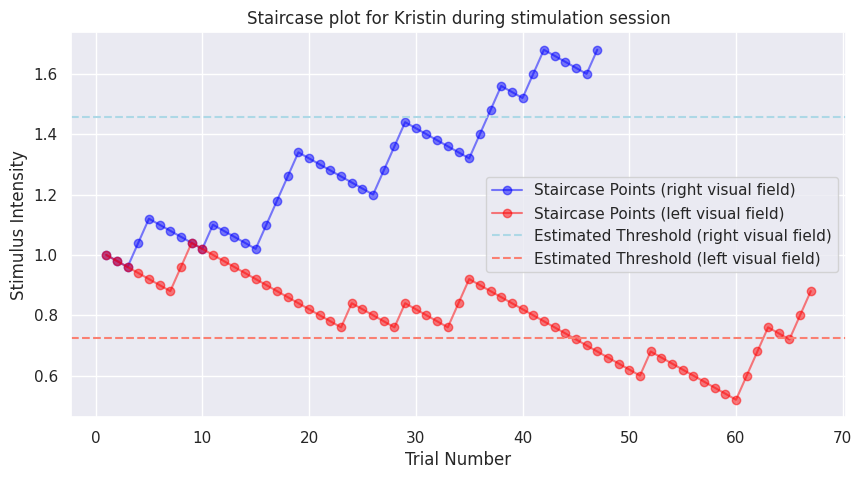

In [36]:
create_staircase(response_all, meta_all, 'Kris_stim')

**Left over**

In [ ]:
# reading base report file
def read_basereport_file(file_path, data_start_row, delimiter=','):
    try:
        # Read the CSV file starting from the actual data row, with the correct delimiter
        data = pd.read_csv(file_path, delimiter=delimiter, skiprows=data_start_row, on_bad_lines='skip')
        return data
    except pd.errors.ParserError as pe:
        print(f"Parser error: {pe}")
        return None
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Example usage
data_start_row = 7  # Adjust this value based on where your actual data starts (0-based index)
delimiter = ','  # Adjust the delimiter if necessary
basereport = read_basereport_file(working_path.joinpath('BaseReport.csv'), data_start_row, delimiter)

In [ ]:
# working on base report
# maybe correct tril is when it is True in the "Is Triggered Correct ROI"
basereport.drop(['Speed Increase', 'TFIncrease', 'Block Number'], axis='columns', inplace=True)

In [ ]:
 # building a plot on accuracy over trials
responses = basereport['Is Triggered Correct ROI'].values  #False for incorrect, True for correct
trials = basereport['Total Trial Number'].values
resp = []
for response in responses:
  if response == True:
    resp.append(1)
  elif response == False:
    resp.append(0)
  else:
    print(response)
    break

accuracy = np.cumsum(resp) / np.arange(1, 63)
plt.figure(figsize=(10, 5))
plt.plot(trials, accuracy, marker='o', linestyle='-')
plt.xlabel('Trial Number')
plt.ylabel('Cumulative Accuracy')
plt.title('Response Accuracy Over Trials')
plt.grid(True)
plt.show()

In [ ]:
def read_staircase(file_path):
    # Initialize dictionaries to store different sections
    metadata = {}
    reversal_list = []
    response_data = None

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # Extract metadata
    metadata_row = lines[0].strip().split(',')
    metadata_values = lines[1].strip().split(',')
    metadata = dict(zip(metadata_row, metadata_values))

    # Find the start indices for each section
    reversal_start_idx = lines.index('Reversal List\n') + 1
    response_start_idx = lines.index('Response,Staircase Points\n') + 1

    # Extract reversal list
    for line in lines[reversal_start_idx:response_start_idx - 2]:
        reversal_list.extend(line.strip().split(','))

    # Extract response data
    response_data = pd.read_csv(file_path, delimiter=',', skiprows=response_start_idx - 1)

    return metadata, reversal_list, response_data